In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
from scipy import stats
import plotly.plotly as py
import plotly.graph_objs as go
from plotly.offline import init_notebook_mode, plot
import plotly
import plotly.io as pio
import os
from sklearn.preprocessing import scale

In [40]:
SOXL = pd.read_csv('soxl_new.csv') #ETF growth cycle
Nasdaq = pd.read_csv('nasdaq_new.csv') #Index
TQQQ = pd.read_csv('tqqq_new.csv') #3X Index
MU = pd.read_csv('mu_new.csv') #high Beta
AMD = pd.read_csv('amd_new.csv') # high beta
NFLX = pd.read_csv('nflx_new.csv') #High growth
AMZN = pd.read_csv('amzn_new.csv') #High growth
V = pd.read_csv('visa_new.csv') #low volalitity
YINN = pd.read_csv('yinn_new.csv') #looks like bell curve
NVDA = pd.read_csv('nvda_new.csv') #high growth
WTW = pd.read_csv('wtw_new.csv') #high beta
F = pd.read_csv('f_new.csv') #highly traded
MSFT = pd.read_csv('mfst_new.csv') #high traded
HNGR = pd.read_csv('hngr_new.csv') #high beta cyclic




In [41]:
df_cln = AMZN
i=20
dum_df =[]
while i < 100:
   
    size = i/100
    target_names = ['target_3roi']
    stop = round(size*len(df_cln))

    df_cln_train = df_cln.loc[:stop,target_names]
    df_cln_test = df_cln.loc[stop:,target_names]

    df = stats.ttest_ind(df_cln_train,df_cln_test,
               equal_var = True)
    p_val = df.pvalue[0]
    mn_diff = np.mean(df_cln_train).values[0] - np.mean(df_cln_test).values[0]
    var_diff = np.var(df_cln_train).values[0] - np.var(df_cln_test).values[0]
    holder = [p_val, mn_diff, var_diff]
    dum_df.append(holder)
    i+=1
col_names =['pvalues','mean_diff','var_diff']
pvalue_df = pd.DataFrame(dum_df,columns=col_names)
#dum_df

In [42]:
features =['ma200',
           'percent_down',        
           'obv',                 
           'ma60',                
           'rsi200',              
           'tsf20',               
           'tsf200',              
           'slope60',             
           'tsf60',               
           'r_sqr_60',            
           'macd_diff_hist',      
           'ma20',                
           'Day_previous_roi',    
           'ma10',                
           'rsi60',               
           'tsf10',               
           'sine',                
           'slope10',             
           'r_sqr_10',            
           'macd_diff',           
           'r_sqr_5',             
           'rsi20',               
           'slope5',              
           'rsi10',               
           'leadsine']
    

In [43]:
df_cln = TQQQ
target_name = 'tar_1best_class'

i=20
acc_array =[]
while i < 100:
    size = i/100   
    stop = round(size*len(df_cln))

#set features

    feature_train = df_cln.loc[:stop,features]
    feature_test = df_cln.loc[stop:,features]
    
#set my targets

    target_train = df_cln.loc[:stop,[target_name]]
    target_test = df_cln.loc[stop:,[target_name]]
    
    rf2 = RandomForestClassifier(n_estimators=1100,
                                 random_state=42,
                                 n_jobs=-1,
                                 max_features=4,
                                 max_depth=11,
                                 criterion="gini",
                                 warm_start=True )

# Train the classifier
    rf2.fit(feature_train, target_train)

# prediction on test set
    target_pred=rf2.predict(feature_test)
    target_pred2=rf2.predict(feature_train)

    acc_array.append(metrics.accuracy_score(target_test, target_pred))
    i+=1
      
#acc_array

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

In [44]:
acc_df =pd.DataFrame(acc_array,columns=['accuracy'])

In [45]:
#merge dataframes
print(pvalue_df.shape,acc_df.shape)

(80, 3) (80, 1)


In [46]:
merge_df = acc_df.merge(pvalue_df,left_index=True,right_index=True)
merge_df.head()

,accuracy,pvalues,mean_diff,var_diff
0,0.303789,0.065127,0.004176,0.011550
1,0.296682,0.050692,0.004344,0.011138
2,0.301054,0.055515,0.004189,0.010908
3,0.314419,0.021225,0.004957,0.010511
4,0.319811,0.032361,0.004537,0.010119


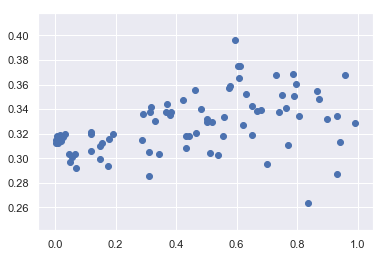

In [47]:
x = merge_df['pvalues']
y = merge_df['accuracy']
plt.scatter(x,y)
plt.show()

In [48]:
qtiles = merge_df['var_diff'].quantile([0.25,0.5,0.75]).values
q1 = qtiles[0]
q2 = qtiles[1]
q3 = qtiles[2]

end = merge_df.shape[0]
mn_arr = []
bin_arr = []
for i in range(end):
    if merge_df['var_diff'][i] < 0:
         bin_arr.append(0)
    else: 
        if  merge_df['var_diff'][i] > q2:
            bin_arr.append(2)
        else:
            bin_arr.append(1)
       
    if merge_df['mean_diff'][i] <= 0:
        mn_arr.append(1)
    else:
        mn_arr.append(0)
merge_df['class_var'] = bin_arr
merge_df['dummy_mean'] = mn_arr

In [49]:
merge_df.head()

,accuracy,pvalues,mean_diff,var_diff,class_var,dummy_mean
0,0.303789,0.065127,0.004176,0.011550,2,0
1,0.296682,0.050692,0.004344,0.011138,2,0
2,0.301054,0.055515,0.004189,0.010908,2,0
3,0.314419,0.021225,0.004957,0.010511,2,0
4,0.319811,0.032361,0.004537,0.010119,2,0


//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



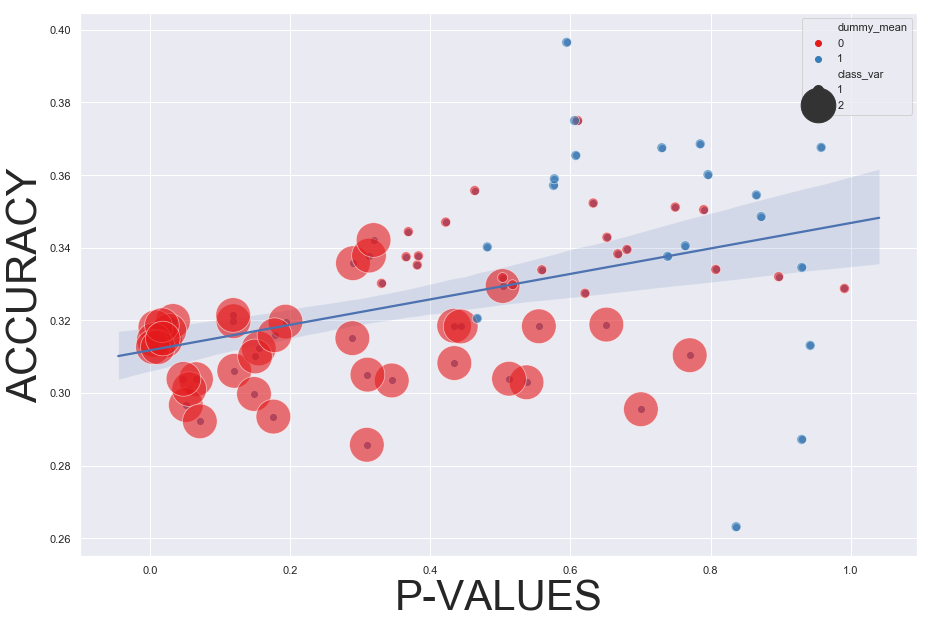

In [50]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.cubehelix_palette(dark=.1, light=.1, as_cmap=True)
ax = sns.regplot(x="pvalues", y="accuracy", data=merge_df)
ax = sns.scatterplot(x='pvalues', y='accuracy',
                     hue="dummy_mean", 
                     size="class_var",
                     palette="Set1",
                     sizes=(100,1200),
                     alpha = .6,
                     legend='full',
                     data=merge_df)
ax.set_xlabel('P-VALUES',fontsize=42);
ax.set_ylabel('ACCURACY',fontsize=42);


In [51]:
df_cln = WTW
i=20
dum_df =[]
while i < 100:
   
    size = i/100
    target_names = ['target_3roi']
    stop = round(size*len(df_cln))

    df_cln_train = df_cln.loc[:stop,target_names]
    df_cln_test = df_cln.loc[stop:,target_names]

    df = stats.ttest_ind(df_cln_train,df_cln_test,
               equal_var = True)
    p_val = df.pvalue[0]
    mn_diff = np.mean(df_cln_train).values[0] - np.mean(df_cln_test).values[0]
    var_diff = np.var(df_cln_train).values[0] - np.var(df_cln_test).values[0]
    holder = [p_val, mn_diff, var_diff]
    dum_df.append(holder)
    i+=1
col_names =['pvalues','mean_diff','var_diff']
pvalue_df = pd.DataFrame(dum_df,columns=col_names)
#dum_df

In [52]:
df_cln = WTW
target_name = 'tar_3best_class'

i=20
acc_array =[]
while i < 100:
    size = i/100   
    stop = round(size*len(df_cln))

#set features

    feature_train = df_cln.loc[:stop,features]
    feature_test = df_cln.loc[stop:,features]
    
#set my targets

    target_train = df_cln.loc[:stop,[target_name]]
    target_test = df_cln.loc[stop:,[target_name]]
    
    rf2 = RandomForestClassifier(n_estimators=1100,
                                 random_state=42,
                                 n_jobs=-1,
                                 max_features=4,
                                 max_depth=11,
                                 criterion="gini",
                                 warm_start=True )

# Train the classifier
    rf2.fit(feature_train, target_train)

# prediction on test set
    target_pred=rf2.predict(feature_test)
    target_pred2=rf2.predict(feature_train)

    acc_array.append(metrics.accuracy_score(target_test, target_pred))
    i+=1
      
#acc_array
acc_df =pd.DataFrame(acc_array,columns=['accuracy'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

In [15]:
merge_df = acc_df.merge(pvalue_df,left_index=True,right_index=True)
merge_df.head()

,accuracy,pvalues,mean_diff,var_diff
0,0.261897,0.423433,-0.001999,-0.003869
1,0.267402,0.449544,-0.001855,-0.003956
2,0.262201,0.497293,-0.001638,-0.004017
3,0.251696,0.348488,-0.002227,-0.004082
4,0.254748,0.274666,-0.002556,-0.004163


In [16]:
qtiles = merge_df['var_diff'].quantile([0.25,0.5,0.75]).values
q1 = qtiles[0]
q2 = qtiles[1]
q3 = qtiles[2]

end = merge_df.shape[0]
mn_arr = []
bin_arr = []
for i in range(end):
    if merge_df['var_diff'][i] < 0:
         bin_arr.append(0)
    else: 
        if  merge_df['var_diff'][i] > q2:
            bin_arr.append(2)
        else:
            bin_arr.append(1)
       
    if merge_df['mean_diff'][i] <= 0:
        mn_arr.append(1)
    else:
        mn_arr.append(0)
merge_df['class_var'] = bin_arr
merge_df['dummy_mean'] = mn_arr

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



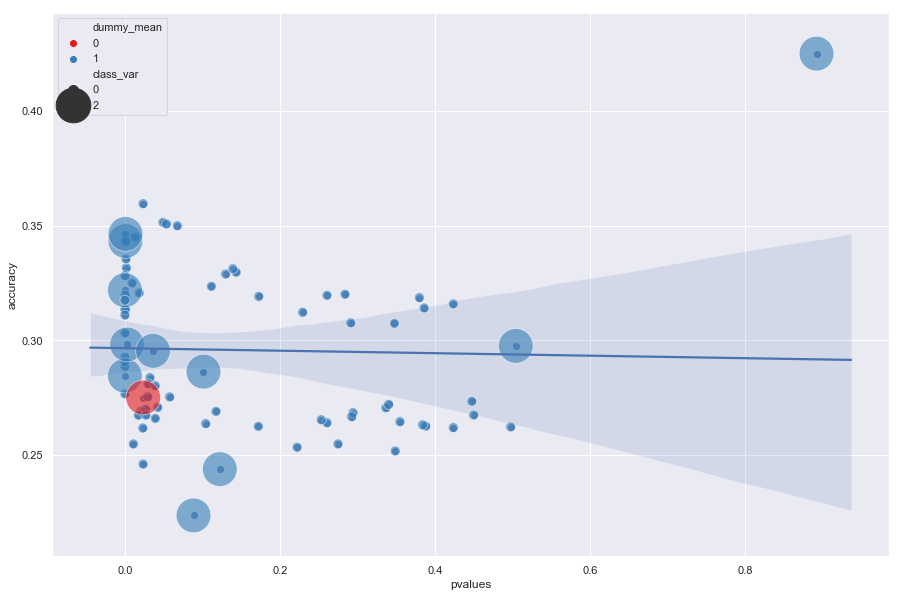

In [17]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.cubehelix_palette(dark=.1, light=.1, as_cmap=True)
ax = sns.regplot(x="pvalues", y="accuracy", data=merge_df)
ax = sns.scatterplot(x='pvalues', y='accuracy',
                     hue="dummy_mean", 
                     size="class_var",
                     palette="Set1",
                     sizes=(100,1200),
                     alpha = .6,
                     legend='full',
                     data=merge_df)

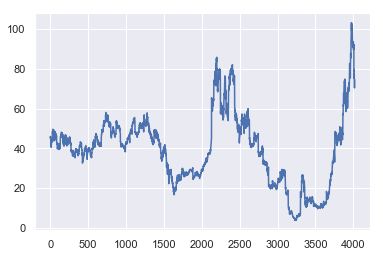

In [18]:
plt.plot(WTW['Close'])
plt.show()

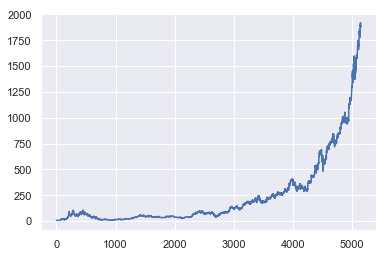

In [19]:
plt.plot(AMZN['Close'])
plt.show()

In [20]:
df_cln = AMD
target_name = 'tar_3best_class'

i=20
acc_array =[]
while i < 100:
    size = i/100   
    stop = round(size*len(df_cln))

#set features

    feature_train = df_cln.loc[:stop,features]
    feature_test = df_cln.loc[stop:,features]
    
#set my targets

    target_train = df_cln.loc[:stop,[target_name]]
    target_test = df_cln.loc[stop:,[target_name]]
    
    rf2 = RandomForestClassifier(n_estimators=1100,
                                 random_state=42,
                                 n_jobs=-1,
                                 max_features=4,
                                 max_depth=11,
                                 criterion="gini",
                                 warm_start=True )

# Train the classifier
    rf2.fit(feature_train, target_train)

# prediction on test set
    target_pred=rf2.predict(feature_test)
    target_pred2=rf2.predict(feature_train)

    acc_array.append(metrics.accuracy_score(target_test, target_pred))
    i+=1
      
#acc_array
acc_df =pd.DataFrame(acc_array,columns=['accuracy'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

In [21]:
df_cln = AMD
i=20
dum_df =[]
while i < 100:
   
    size = i/100
    target_names = ['target_3roi']
    stop = round(size*len(df_cln))

    df_cln_train = df_cln.loc[:stop,target_names]
    df_cln_test = df_cln.loc[stop:,target_names]

    df = stats.ttest_ind(df_cln_train,df_cln_test,
               equal_var = True)
    p_val = df.pvalue[0]
    mn_diff = np.mean(df_cln_train).values[0] - np.mean(df_cln_test).values[0]
    var_diff = np.var(df_cln_train).values[0] - np.var(df_cln_test).values[0]
    holder = [p_val, mn_diff, var_diff]
    dum_df.append(holder)
    i+=1
col_names =['pvalues','mean_diff','var_diff']
pvalue_df = pd.DataFrame(dum_df,columns=col_names)
#dum_df

In [22]:
merge_df = acc_df.merge(pvalue_df,left_index=True,right_index=True)
merge_df.head()

,accuracy,pvalues,mean_diff,var_diff
0,0.252568,0.825011,-0.000372,-0.001102
1,0.267636,0.265254,-0.001843,-0.001142
2,0.266207,0.338111,-0.001558,-0.001234
3,0.269394,0.277329,-0.001739,-0.001380
4,0.266704,0.210041,-0.001977,-0.001514


In [23]:
qtiles = merge_df['var_diff'].quantile([0.25,0.5,0.75]).values
q1 = qtiles[0]
q2 = qtiles[1]
q3 = qtiles[2]

end = merge_df.shape[0]
mn_arr = []
bin_arr = []
for i in range(end):
    if merge_df['var_diff'][i] < 0:
         bin_arr.append(0)
    else: 
        if  merge_df['var_diff'][i] > q2:
            bin_arr.append(2)
        else:
            bin_arr.append(1)
       
    if merge_df['mean_diff'][i] <= 0:
        mn_arr.append(1)
    else:
        mn_arr.append(0)
merge_df['class_var'] = bin_arr
merge_df['dummy_mean'] = mn_arr

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



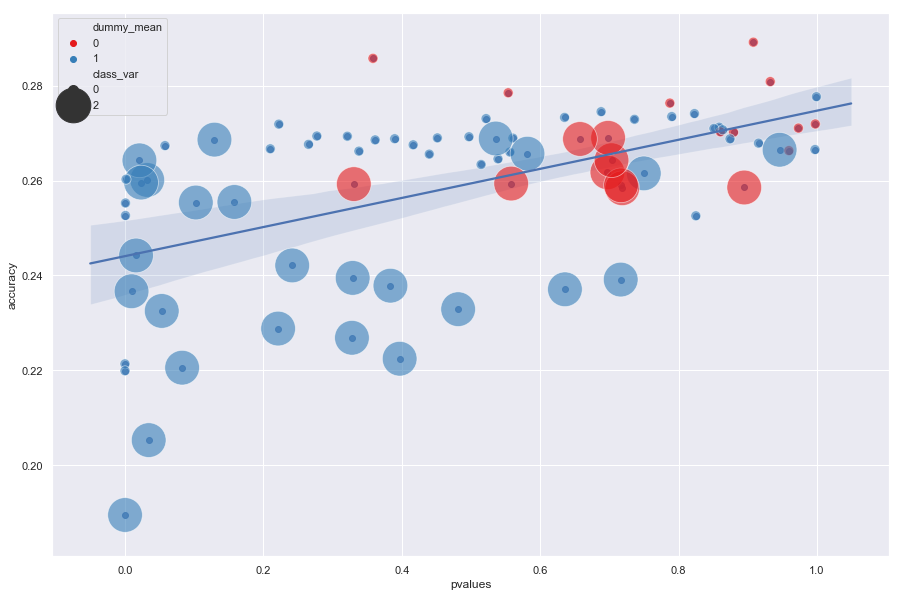

In [24]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.cubehelix_palette(dark=.1, light=.1, as_cmap=True)
ax = sns.regplot(x="pvalues", y="accuracy", data=merge_df)
ax = sns.scatterplot(x='pvalues', y='accuracy',
                     hue="dummy_mean", 
                     size="class_var",
                     palette="Set1",
                     sizes=(100,1200),
                     alpha = .6,
                     legend='full',
                     data=merge_df)

In [25]:
df_cln = V
target_name = 'tar_3best_class'

i=20
acc_array =[]
while i < 100:
    size = i/100   
    stop = round(size*len(df_cln))

#set features

    feature_train = df_cln.loc[:stop,features]
    feature_test = df_cln.loc[stop:,features]
    
#set my targets

    target_train = df_cln.loc[:stop,[target_name]]
    target_test = df_cln.loc[stop:,[target_name]]
    
    rf2 = RandomForestClassifier(n_estimators=1100,
                                 random_state=42,
                                 n_jobs=-1,
                                 max_features=4,
                                 max_depth=11,
                                 criterion="gini",
                                 warm_start=True )

# Train the classifier
    rf2.fit(feature_train, target_train)

# prediction on test set
    target_pred=rf2.predict(feature_test)
    target_pred2=rf2.predict(feature_train)

    acc_array.append(metrics.accuracy_score(target_test, target_pred))
    i+=1
      
#acc_array
acc_df =pd.DataFrame(acc_array,columns=['accuracy'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

In [26]:
df_cln = V
i=20
dum_df =[]
while i < 100:
   
    size = i/100
    target_names = ['target_3roi']
    stop = round(size*len(df_cln))

    df_cln_train = df_cln.loc[:stop,target_names]
    df_cln_test = df_cln.loc[stop:,target_names]

    df = stats.ttest_ind(df_cln_train,df_cln_test,
               equal_var = True)
    p_val = df.pvalue[0]
    mn_diff = np.mean(df_cln_train).values[0] - np.mean(df_cln_test).values[0]
    var_diff = np.var(df_cln_train).values[0] - np.var(df_cln_test).values[0]
    holder = [p_val, mn_diff, var_diff]
    dum_df.append(holder)
    i+=1
col_names =['pvalues','mean_diff','var_diff']
pvalue_df = pd.DataFrame(dum_df,columns=col_names)
#dum_df

In [27]:
merge_df = acc_df.merge(pvalue_df,left_index=True,right_index=True)
merge_df.head()

,accuracy,pvalues,mean_diff,var_diff
0,0.295876,0.662264,-0.000566,0.000681
1,0.292797,0.295931,-0.001330,0.000803
2,0.289265,0.352653,-0.001163,0.000764
3,0.291912,0.211205,-0.001540,0.000731
4,0.297884,0.360155,-0.001111,0.000689


In [28]:
qtiles = merge_df['var_diff'].quantile([0.25,0.5,0.75]).values
q1 = qtiles[0]
q2 = qtiles[1]
q3 = qtiles[2]

end = merge_df.shape[0]
mn_arr = []
bin_arr = []
for i in range(end):
    if merge_df['var_diff'][i] < 0:
         bin_arr.append(0)
    else: 
        if  merge_df['var_diff'][i] > q2:
            bin_arr.append(2)
        else:
            bin_arr.append(1)
       
    if merge_df['mean_diff'][i] <= 0:
        mn_arr.append(1)
    else:
        mn_arr.append(0)
merge_df['class_var'] = bin_arr
merge_df['dummy_mean'] = mn_arr

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



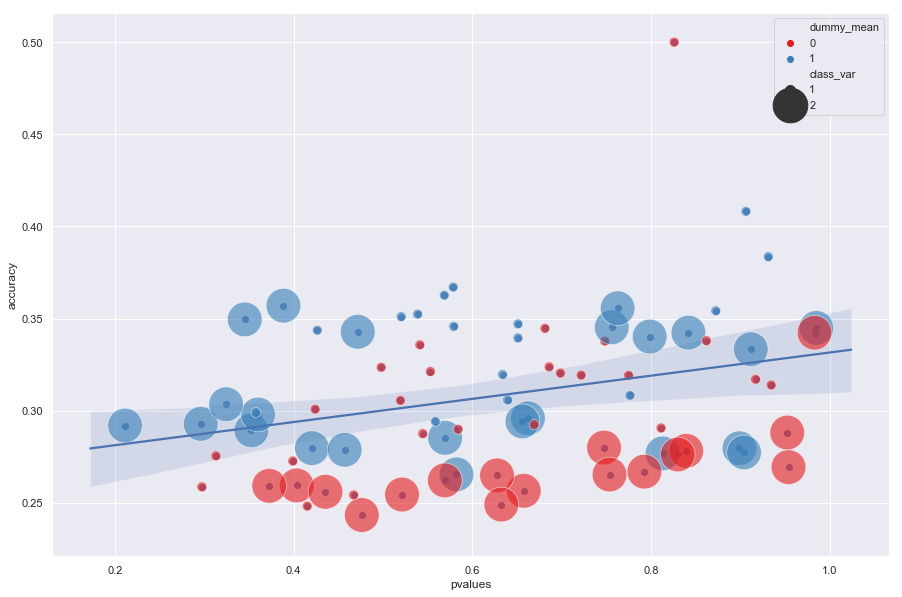

In [29]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.cubehelix_palette(dark=.1, light=.1, as_cmap=True)
ax = sns.regplot(x="pvalues", y="accuracy", data=merge_df)
ax = sns.scatterplot(x='pvalues', y='accuracy',
                     hue="dummy_mean", 
                     size="class_var",
                     palette="Set1",
                     sizes=(100,1200),
                     alpha = .6,
                     legend='full',
                     data=merge_df)


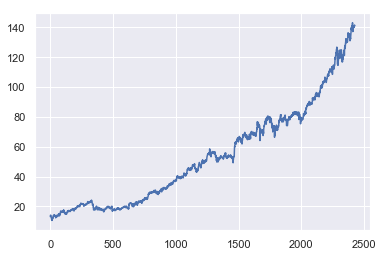

In [30]:
plt.plot(V['Open'])
plt.show()

In [31]:
df_cln = SOXL
target_name = 'tar_3best_class'

i=20
acc_array =[]
while i < 100:
    size = i/100   
    stop = round(size*len(df_cln))

#set features

    feature_train = df_cln.loc[:stop,features]
    feature_test = df_cln.loc[stop:,features]
    
#set my targets

    target_train = df_cln.loc[:stop,[target_name]]
    target_test = df_cln.loc[stop:,[target_name]]
    
    rf2 = RandomForestClassifier(n_estimators=1100,
                                 random_state=42,
                                 n_jobs=-1,
                                 max_features=4,
                                 max_depth=11,
                                 criterion="gini",
                                 warm_start=True )

# Train the classifier
    rf2.fit(feature_train, target_train)

# prediction on test set
    target_pred=rf2.predict(feature_test)
    target_pred2=rf2.predict(feature_train)

    acc_array.append(metrics.accuracy_score(target_test, target_pred))
    i+=1
      
#acc_array
acc_df =pd.DataFrame(acc_array,columns=['accuracy'])

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().

//anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:29: DataConversionWarning:

A column-vector y was p

In [32]:
df_cln = SOXL
i=20
dum_df =[]
while i < 100:
   
    size = i/100
    target_names = ['target_3roi']
    stop = round(size*len(df_cln))

    df_cln_train = df_cln.loc[:stop,target_names]
    df_cln_test = df_cln.loc[stop:,target_names]

    df = stats.ttest_ind(df_cln_train,df_cln_test,
               equal_var = True)
    p_val = df.pvalue[0]
    mn_diff = np.mean(df_cln_train).values[0] - np.mean(df_cln_test).values[0]
    var_diff = np.var(df_cln_train).values[0] - np.var(df_cln_test).values[0]
    holder = [p_val, mn_diff, var_diff]
    dum_df.append(holder)
    i+=1
col_names =['pvalues','mean_diff','var_diff']
pvalue_df = pd.DataFrame(dum_df,columns=col_names)
#dum_df

In [33]:
merge_df = acc_df.merge(pvalue_df,left_index=True,right_index=True)
merge_df.head()

,accuracy,pvalues,mean_diff,var_diff
0,0.286641,0.018885,-0.009648,0.004585
1,0.270696,0.076021,-0.007152,0.004635
2,0.276780,0.058787,-0.007490,0.004277
3,0.270889,0.033737,-0.008285,0.004069
4,0.269625,0.013158,-0.009534,0.003849


In [34]:
qtiles = merge_df['var_diff'].quantile([0.25,0.5,0.75]).values
q1 = qtiles[0]
q2 = qtiles[1]
q3 = qtiles[2]

end = merge_df.shape[0]
mn_arr = []
bin_arr = []
for i in range(end):
    if merge_df['var_diff'][i] < 0:
         bin_arr.append(0)
    else: 
        if  merge_df['var_diff'][i] > q2:
            bin_arr.append(2)
        else:
            bin_arr.append(1)
       
    if merge_df['mean_diff'][i] <= 0:
        mn_arr.append(1)
    else:
        mn_arr.append(0)
merge_df['class_var'] = bin_arr
merge_df['dummy_mean'] = mn_arr

//anaconda/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning:

Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.



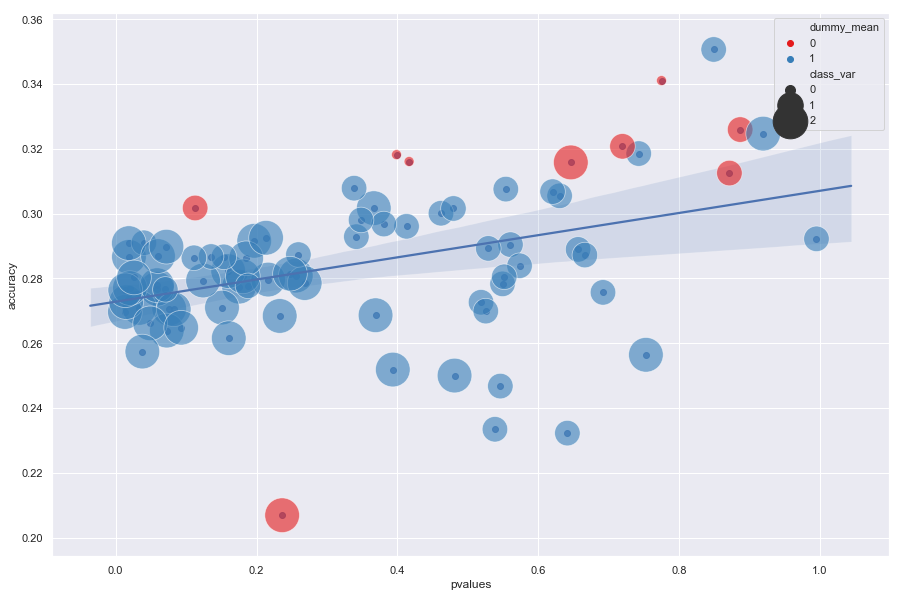

In [35]:
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
fig.set_size_inches(15, 10)

cmap = sns.cubehelix_palette(dark=.1, light=.1, as_cmap=True)
ax = sns.regplot(x="pvalues", y="accuracy", data=merge_df)
ax = sns.scatterplot(x='pvalues', y='accuracy',
                     hue="dummy_mean", 
                     size="class_var",
                     palette="Set1",
                     sizes=(100,1200),
                     alpha = .6,
                     legend='full',
                     data=merge_df)